## Importing Libraries and Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score ,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

## Data Visualization:

In [2]:
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


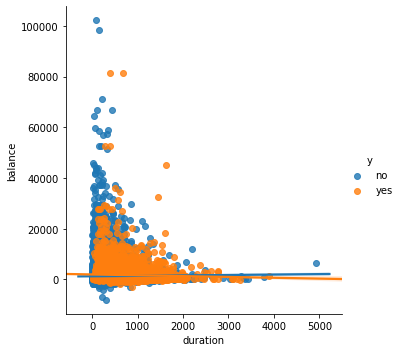

In [5]:
sns.lmplot(x='duration',y='balance',hue='y',data=df)

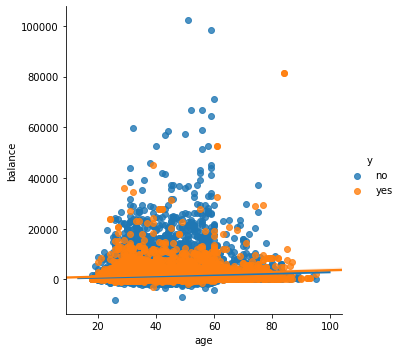

In [6]:
sns.lmplot(x='age',y='balance',hue='y',data=df)

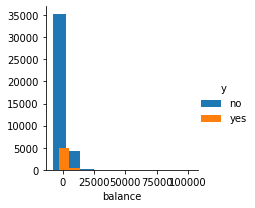

In [20]:
g = sns.FacetGrid(df,hue="y")
g.map(plt.hist, "balance")
g.add_legend();

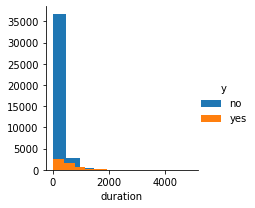

In [26]:
g = sns.FacetGrid(df,hue="y")
g.map(plt.hist, "duration")
g.add_legend();

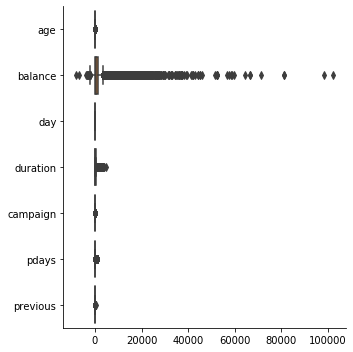

In [30]:
sns.catplot(data=df, orient="h", kind="box");

In [31]:
features = df.iloc[:,:].values
print(features)

[[58 'management' 'married' ... 0 'unknown' 'no']
 [44 'technician' 'single' ... 0 'unknown' 'no']
 [33 'entrepreneur' 'married' ... 0 'unknown' 'no']
 ...
 [72 'retired' 'married' ... 3 'success' 'yes']
 [57 'blue-collar' 'married' ... 0 'unknown' 'no']
 [37 'entrepreneur' 'married' ... 11 'other' 'no']]


In [32]:
encode=LabelEncoder()
for i in [1,2,3,4,6,7,8,10,15,16] :
    features[:,i] = encode.fit_transform(features[:,i])

In [37]:
column_list=df.columns.to_numpy().tolist()
data=pd.DataFrame(features)
data.columns=column_list
data=data.astype(float)

In [38]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143.0,1.0,0.0,2.0,5.0,8.0,261.0,1.0,-1.0,0.0,3.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29.0,1.0,0.0,2.0,5.0,8.0,151.0,1.0,-1.0,0.0,3.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,5.0,8.0,76.0,1.0,-1.0,0.0,3.0,0.0
3,47.0,1.0,1.0,3.0,0.0,1506.0,1.0,0.0,2.0,5.0,8.0,92.0,1.0,-1.0,0.0,3.0,0.0
4,33.0,11.0,2.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,8.0,198.0,1.0,-1.0,0.0,3.0,0.0


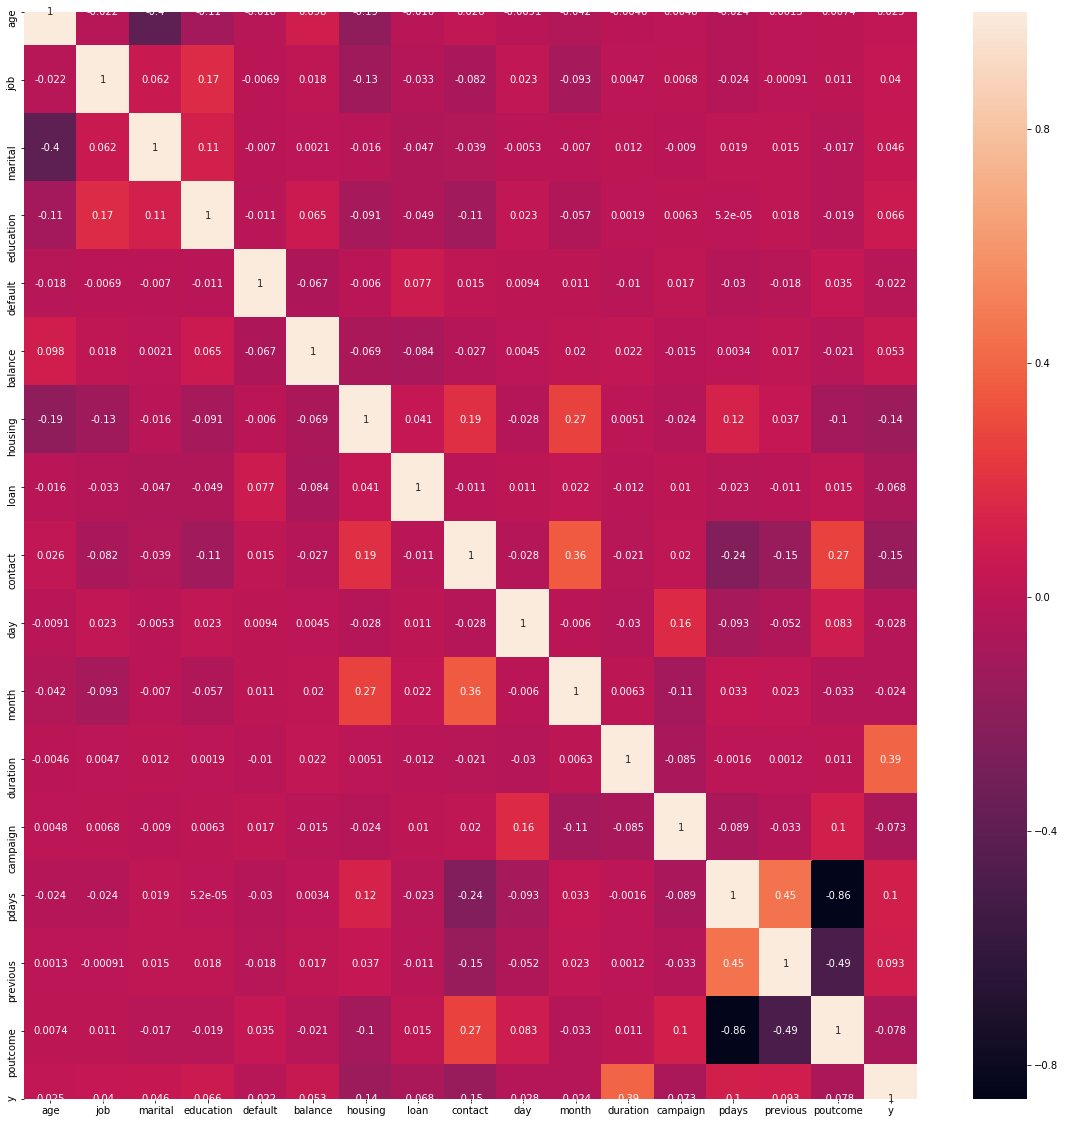

In [39]:
correlate=data.corr()
top_corr_features=correlate.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True)

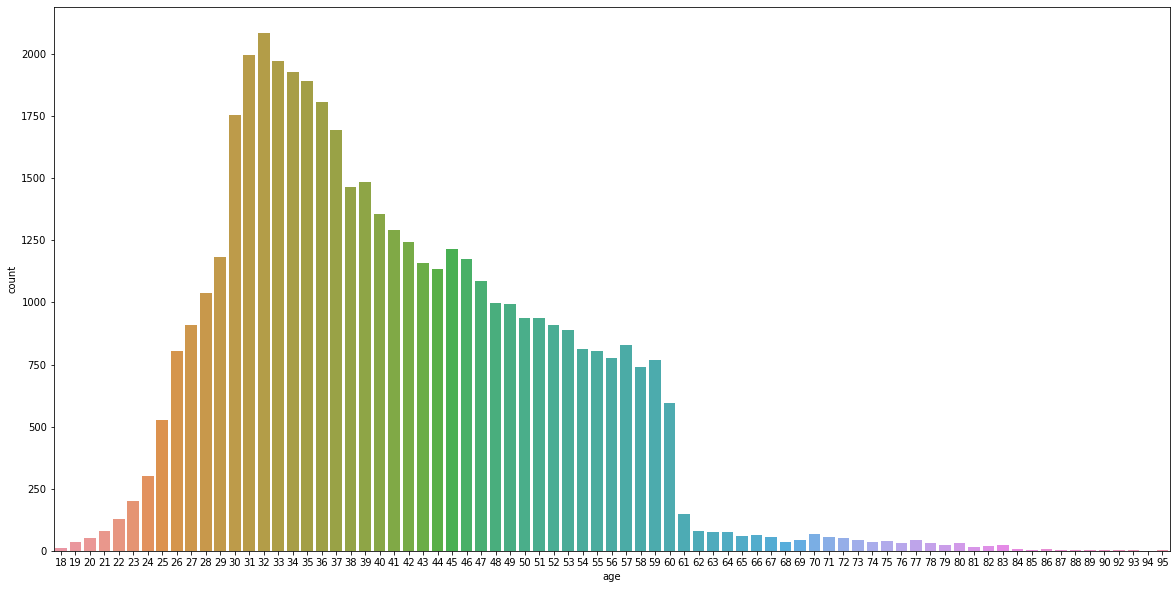

In [44]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'age', data= df)

## Data Pipeline Function:

In [7]:
def preprocessing_pipeline():
    file_name=input()
    data1=pd.read_csv(file_name)
    
    
    # splitting the data into two parts--->features 
    
    features = data1.iloc[:,:-1].values
    
    column_list=data1.columns.to_numpy().tolist()
    column_list.pop()
    
    #for transformation cat data ---> num data

    #--------------->LABEL ENCODING<------------------
    #label encoding convert the categorical data to num data
    #the columns with categorical data are 1,2,3,4,6,7,8,10,15 columns
    
    encode=LabelEncoder()
    for i in [1,2,3,4,6,7,8,10,15]:
        features[:,i] = encode.fit_transform(features[:,i])
        
    #getting target data
    
    target=data1.iloc[:,-1:]=='yes'
    target=encode.fit_transform(target)
    
    #getting final data
    
    final_data=pd.DataFrame(features)
    final_data.columns=column_list
    final_data=final_data.astype(float)
    
    
    numerical_columns=['age','balance','day','duration','campaign','pdays','previous']
    
    #splitting into train and test    
    X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=0)
    
    #checking and filling the missing values using imputer
    my_imputer = SimpleImputer()
    final_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
    final_X_test = pd.DataFrame(my_imputer.transform(X_test))

    # Imputation removed column names; put them back
    final_X_train.columns = X_train.columns
    final_X_test.columns = X_test.columns
        
    #feature scaling numerical data
    for i in numerical_columns :
        scale = StandardScaler().fit(final_X_train[[i]])
        final_X_train[i] = scale.transform(final_X_train[[i]])
        final_X_test[i] = scale.transform(final_X_test[[i]])
     
        
    return( final_X_train, final_X_test, y_train, y_test )

In [8]:
train_X,test_X,train_y,test_y = preprocessing_pipeline()

bank-full.csv


In [9]:
train_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.182764,7.0,1.0,1.0,0.0,0.804030,1.0,0.0,0.0,0.504717,0.0,-0.718420,-0.568359,-0.411313,-0.239065,3.0
1,-0.937547,4.0,2.0,2.0,0.0,-0.097112,1.0,0.0,1.0,1.586706,4.0,-0.679683,-0.568359,-0.411313,-0.239065,3.0
2,-0.465807,0.0,2.0,1.0,0.0,-0.157360,1.0,1.0,0.0,-0.216609,8.0,0.404962,1.050204,-0.411313,-0.239065,3.0
3,-2.069721,8.0,2.0,1.0,0.0,-0.315873,0.0,0.0,0.0,-1.298599,0.0,0.269381,0.079067,-0.411313,-0.239065,3.0
4,0.383324,3.0,1.0,2.0,0.0,-0.442812,0.0,0.0,2.0,-0.817714,6.0,-0.609956,-0.568359,-0.411313,-0.239065,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,-0.560155,4.0,2.0,2.0,0.0,-0.122242,0.0,0.0,0.0,-1.298599,3.0,-0.846253,-0.568359,-0.411313,-0.239065,3.0
33904,-0.560155,4.0,1.0,2.0,0.0,-0.201176,1.0,0.0,0.0,0.264275,1.0,-0.094749,2.992479,-0.411313,-0.239065,3.0
33905,-0.560155,4.0,1.0,2.0,0.0,-0.338748,0.0,0.0,0.0,-0.577272,4.0,0.013715,-0.244646,-0.411313,-0.239065,3.0
33906,2.742021,5.0,1.0,1.0,0.0,-0.244349,0.0,0.0,0.0,1.346264,0.0,-0.420143,-0.244646,1.414717,0.169206,0.0


In [10]:
train_y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
test_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.371459,4.0,1.0,2.0,0.0,0.009208,1.0,0.0,0.0,-0.697493,5.0,-0.644819,3.963617,-0.411313,-0.239065,3.0
1,-0.465807,7.0,2.0,1.0,0.0,-0.524324,1.0,0.0,0.0,-0.216609,0.0,3.159185,-0.568359,-0.411313,-0.239065,3.0
2,0.572020,1.0,1.0,0.0,0.0,-0.573618,0.0,1.0,1.0,-0.937935,5.0,-0.056012,0.726492,-0.411313,-0.239065,3.0
3,1.515498,3.0,1.0,0.0,0.0,-0.281400,1.0,1.0,0.0,-0.577272,3.0,-0.590587,1.373917,1.474587,0.577478,0.0
4,-0.748851,1.0,1.0,1.0,1.0,-0.573618,1.0,1.0,0.0,-0.216609,5.0,0.288750,-0.244646,-0.411313,-0.239065,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11298,-0.371459,0.0,1.0,0.0,0.0,0.817884,1.0,0.0,2.0,-0.817714,6.0,-0.702925,-0.244646,-0.411313,-0.239065,3.0
11299,-0.465807,7.0,2.0,1.0,0.0,-0.528835,1.0,0.0,0.0,-0.216609,8.0,-0.613829,1.373917,3.111030,0.169206,0.0
11300,-0.371459,6.0,1.0,0.0,0.0,-0.442812,0.0,0.0,2.0,-1.058156,8.0,-0.563471,0.402779,-0.411313,-0.239065,3.0
11301,0.005932,4.0,1.0,2.0,0.0,-0.237905,1.0,0.0,1.0,1.706927,5.0,-0.687430,-0.244646,-0.411313,-0.239065,3.0


In [12]:
test_y

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

## Trainer Function:

## Trying with few models:

## Training with KNN ALgorithm:

In [13]:
n_neighbors = 9
clf2 = neighbors.KNeighborsClassifier(n_neighbors)
clf2.fit(train_X, train_y)
print("Accuracy Score with training data: ")
print(accuracy_score(train_y, clf2.predict(train_X)))
    
y_pred2=clf2.predict(test_X)
print("Accuracy Score with testing data: ")
print(accuracy_score(test_y, y_pred2))

    
print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred2))
    
print("Precision:")
print(precision_score(test_y,y_pred2) )

print("Recall: ")
print(recall_score(test_y,y_pred2) )

print("F1 score:")
print(f1_score(test_y,y_pred2) )

Accuracy Score with training data: 
0.9135897133419842
Accuracy Score with testing data: 
0.8968415464920817
Confusion Matrix:
[[9760  218]
 [ 948  377]]
Precision:
0.6336134453781512
Recall: 
0.28452830188679246
F1 score:
0.3927083333333333


## Training with Random Forest Model:

In [14]:
#Random Forest-The main model
clf3 = RandomForestClassifier(n_estimators=2, max_depth=10,
            min_samples_split=2, random_state=0)

clf3 = clf3.fit(train_X, train_y)

print("Accuracy Score with training data: ")
print(accuracy_score(train_y, clf3.predict(train_X)))


y_pred3=clf3.predict(test_X)

print("Accuracy Score with testing data: ")
print(accuracy_score(test_y, y_pred3))


print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred3))

print("Precision:")
print(precision_score(test_y,y_pred3) )

print("Recall: ")
print(recall_score(test_y,y_pred3) )

print("F1 score:")
print(f1_score(test_y,y_pred3) )

Accuracy Score with training data: 
0.9154476819629586
Accuracy Score with testing data: 
0.8928603025745377
Confusion Matrix:
[[9652  326]
 [ 885  440]]
Precision:
0.5744125326370757
Recall: 
0.3320754716981132
F1 score:
0.42085126733620276


## Training with Decision Tree Classifier:

In [15]:
clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8,random_state=1).fit(train_X, train_y)
    
print("Accuracy Score with training data: ")
print(accuracy_score(train_y, clf1.predict(train_X)))

y_pred1=clf1.predict(test_X)
print("Accuracy Score with testing data: ")
print(accuracy_score(test_y, y_pred1))

print("Confusion Matrix:")
print(confusion_matrix(test_y,y_pred1))

print("Precision:")
print(precision_score(test_y,y_pred1) )

print("Recall: ")
print(recall_score(test_y,y_pred1) )

print("F1 score:")
print(f1_score(test_y,y_pred1) )

Accuracy Score with training data: 
0.912056151940545
Accuracy Score with testing data: 
0.90020348580023
Confusion Matrix:
[[9594  384]
 [ 744  581]]
Precision:
0.6020725388601036
Recall: 
0.43849056603773584
F1 score:
0.5074235807860261


 We have compared accuracy and other scores with three models and we came to know that Decision Tree looks better than other two algorithm , So we train our model based on Decision Tree.

## Final Trainer Function:

In [16]:
def trainer(train_X,train_y):
    clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8,random_state=1).fit(train_X, train_y)  
    print("Accuracy Score with training data: ")
    print(accuracy_score(train_y, clf1.predict(train_X)))
    return(clf1)


## Tester Function:

In [17]:
def tester(test_X,test_y,model):
    y_pred = model.predict(test_X)
    print("Accuracy Score with testing data: ")
    print(accuracy_score(test_y,y_pred))
    con_mat = confusion_matrix(test_y,y_pred)
    sns.heatmap(con_mat/np.sum(con_mat),fmt='.2%',annot=True,cmap="Blues",center=1)
    print("Precision:")
    print(precision_score(test_y,y_pred))
    print("Recall: ")
    print(recall_score(test_y,y_pred))
    print("F1 score:")
    print(f1_score(test_y,y_pred))


In [18]:
model = trainer(train_X,train_y)

Accuracy Score with training data: 
0.912056151940545


Accuracy Score with testing data: 
0.912056151940545
Precision:
0.6778985507246377
Recall: 
0.47199798183652875
F1 score:
0.5565139797739441


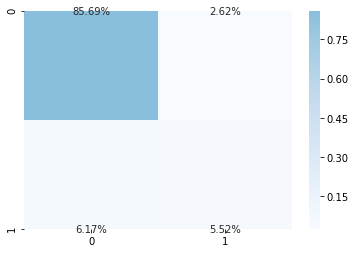

In [19]:
tester(train_X,train_y,model)